In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.rename(columns={'race/ethnicity': 'race',
                  'parental level of education': 'parent education',
                  'test preparation course': 'test preparation'
                  
                       }, inplace=True)

In [5]:
df.head(10)

,gender,race,parent education,lunch,test preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race              1000 non-null   object
 2   parent education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test preparation  1000 non-null   object
 5   math score        1000 non-null   int64 
 6   reading score     1000 non-null   int64 
 7   writing score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender              0
race                0
parent education    0
lunch               0
test preparation    0
math score          0
reading score       0
writing score       0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
print(len(df[df['race'] == 'group A'])),
print(len(df[df['race'] == 'group B'])),
print(len(df[df['race'] == 'group C'])),
print(len(df[df['race'] == 'group D'])),
print(len(df[df['race'] == 'group E']))

89
190
319
262
140


In [11]:
math_score = df.groupby(['race'])['math score'].mean().sort_values(ascending=False).reset_index()
math_score

,race,math score
0,group E,73.821429
1,group D,67.362595
2,group C,64.463950
3,group B,63.452632
4,group A,61.629213


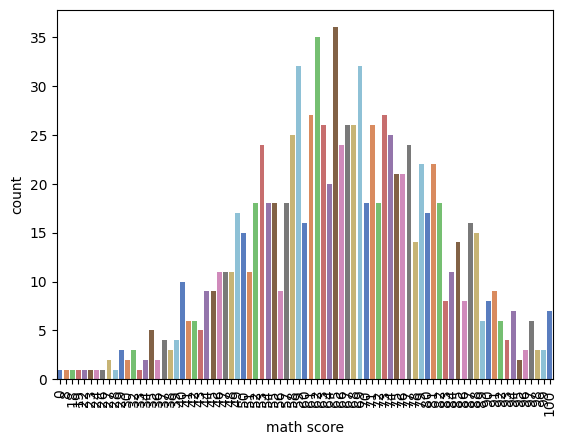

In [12]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [13]:
df['Math_PassStatus'] = np.where(df['math score']<50, 'F', 'P')
df.Math_PassStatus.value_counts()

Math_PassStatus
P    865
F    135
Name: count, dtype: int64

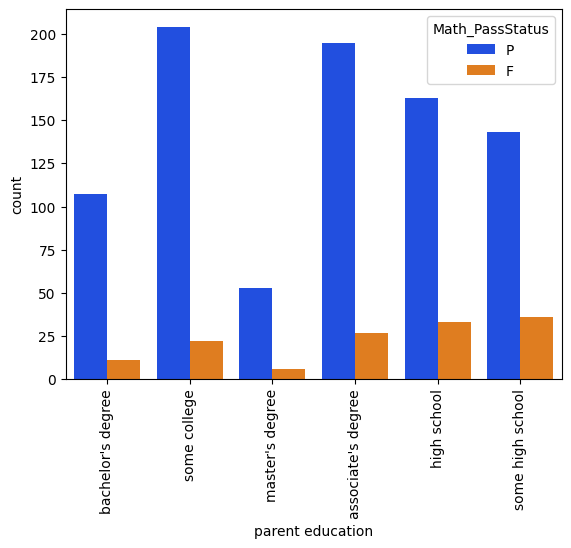

In [14]:
p = sns.countplot(x='parent education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [15]:
reading_score = df.groupby(['race'])['reading score'].mean().sort_values(ascending=False).reset_index()
reading_score

,race,reading score
0,group E,73.028571
1,group D,70.030534
2,group C,69.103448
3,group B,67.352632
4,group A,64.674157


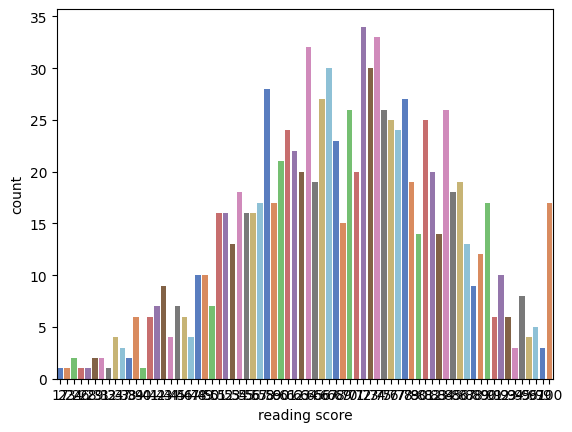

In [16]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [17]:
df['Reading_PassStatus'] = np.where(df['reading score']<50, 'F', 'P')
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    910
F     90
Name: count, dtype: int64

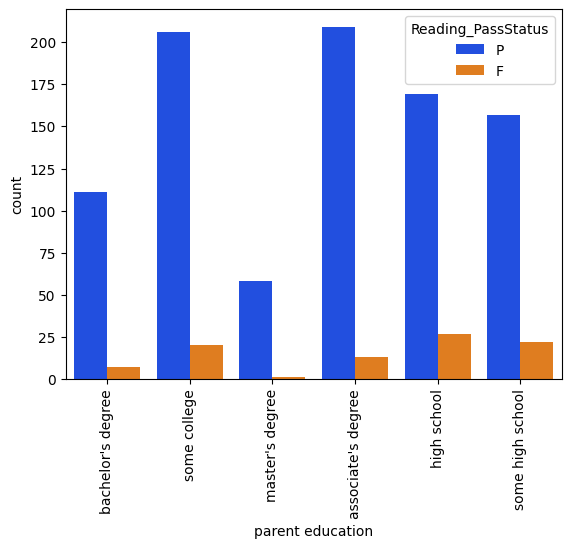

In [18]:
p = sns.countplot(x='parent education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [19]:
writing_score = df.groupby(['race'])['writing score'].mean().sort_values(ascending=False).reset_index()
writing_score

,race,writing score
0,group E,71.407143
1,group D,70.145038
2,group C,67.827586
3,group B,65.600000
4,group A,62.674157


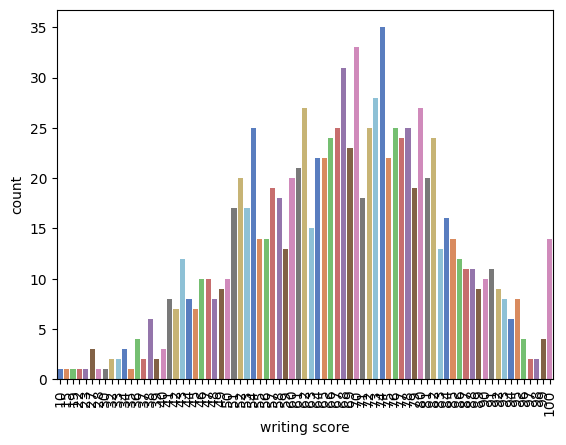

In [20]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [21]:
df['Writing_PassStatus'] = np.where(df['writing score']<50, 'F', 'P')
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    886
F    114
Name: count, dtype: int64

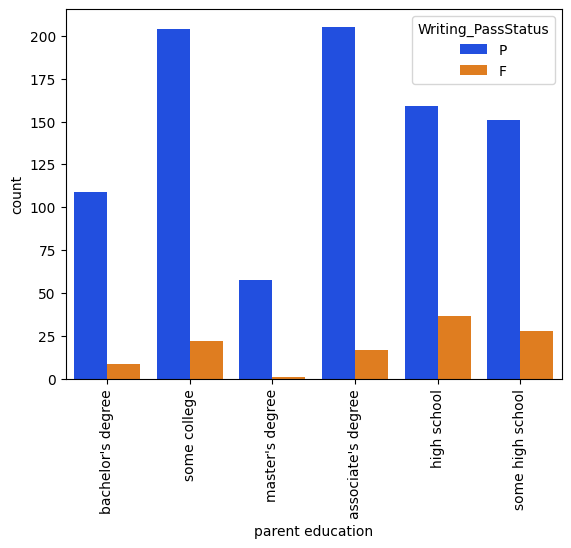

In [22]:
p = sns.countplot(x='parent education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [23]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    812
F    188
Name: count, dtype: int64

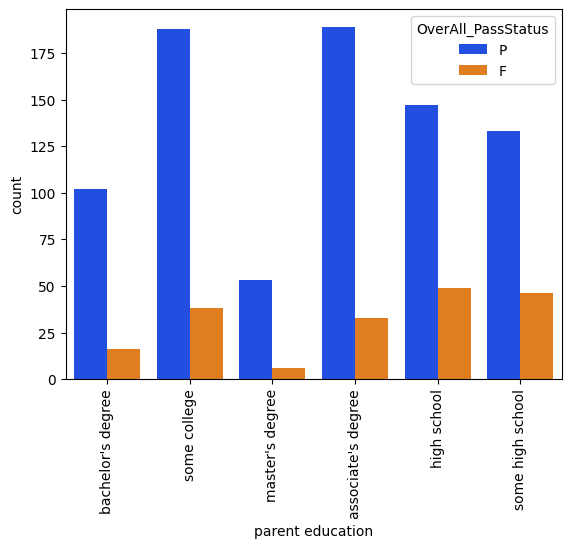

In [24]:
p = sns.countplot(x='parent education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [25]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']

In [26]:
df.head(10)

,gender,race,parent education,lunch,test preparation,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,148
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P,P,232
6,female,group B,some college,standard,completed,88,95,92,P,P,P,P,275
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F,F,122
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P,P,195
9,female,group B,high school,free/reduced,none,38,60,50,F,P,P,F,148


In [27]:
def GetGrade(Total_Marks, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Total_Marks >= 255 ):
        return 'A'
    if ( Total_Marks >= 225):
        return 'B'
    if ( Total_Marks >= 195):
        return 'C'
    if ( Total_Marks >= 165):
        return 'D'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Total_Marks'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
C    277
F    212
B    208
D    187
A    116
Name: count, dtype: int64

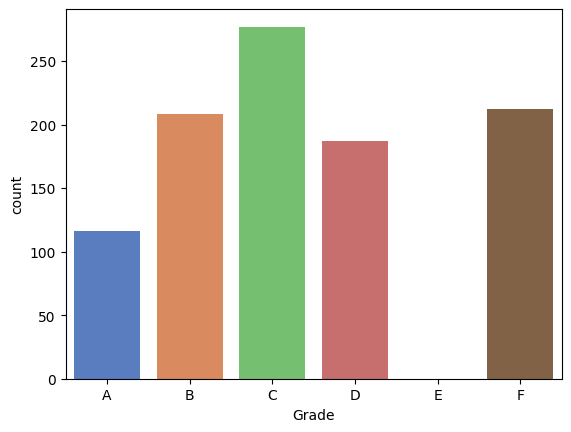

In [28]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

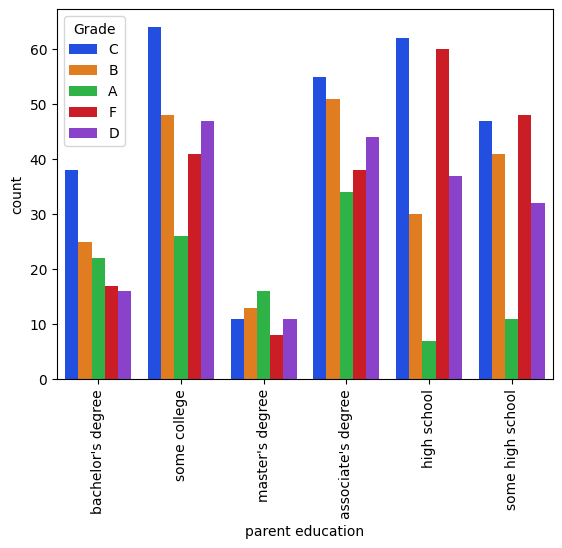

In [29]:
p = sns.countplot(x='parent education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

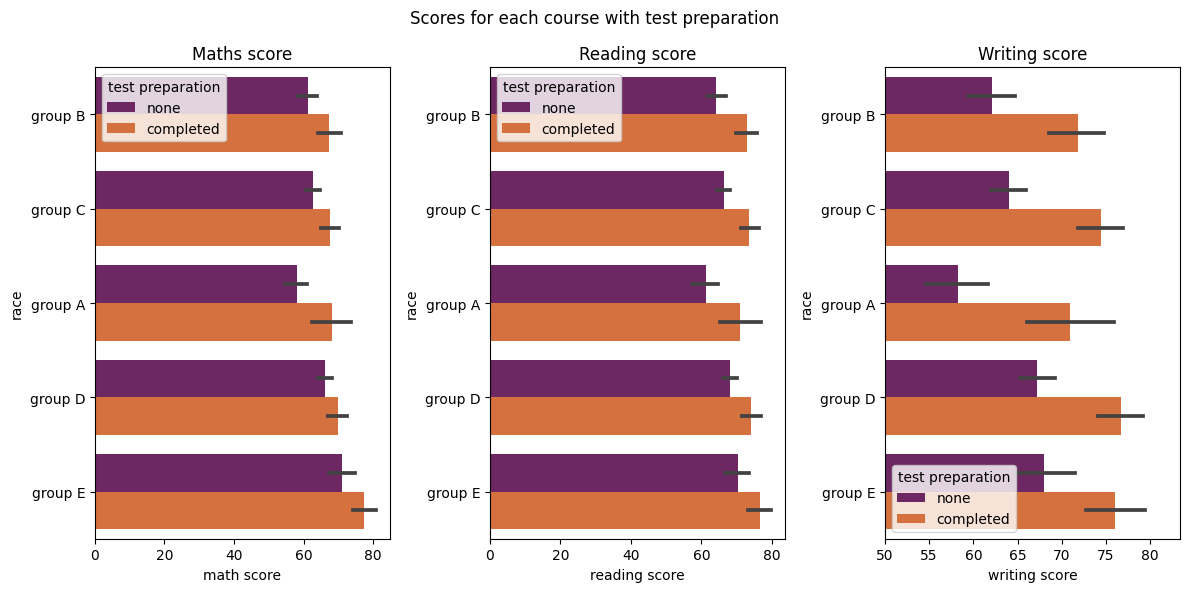

In [30]:
# test preparation
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.suptitle('Scores for each course with test preparation')

ax[0].set_title('Maths score');
ax[1].set_title('Reading score');
ax[2].set_title('Writing score');

sns.barplot(ax=ax[0], data=df, x='math score', y='race', palette='inferno', hue='test preparation');
sns.barplot(ax=ax[1], data=df, x='reading score', y='race', palette='inferno', hue='test preparation');
sns.barplot(ax=ax[2], data=df, x='writing score', y='race', palette='inferno', hue='test preparation');

plt.xlim(50)
plt.tight_layout();
plt.show();

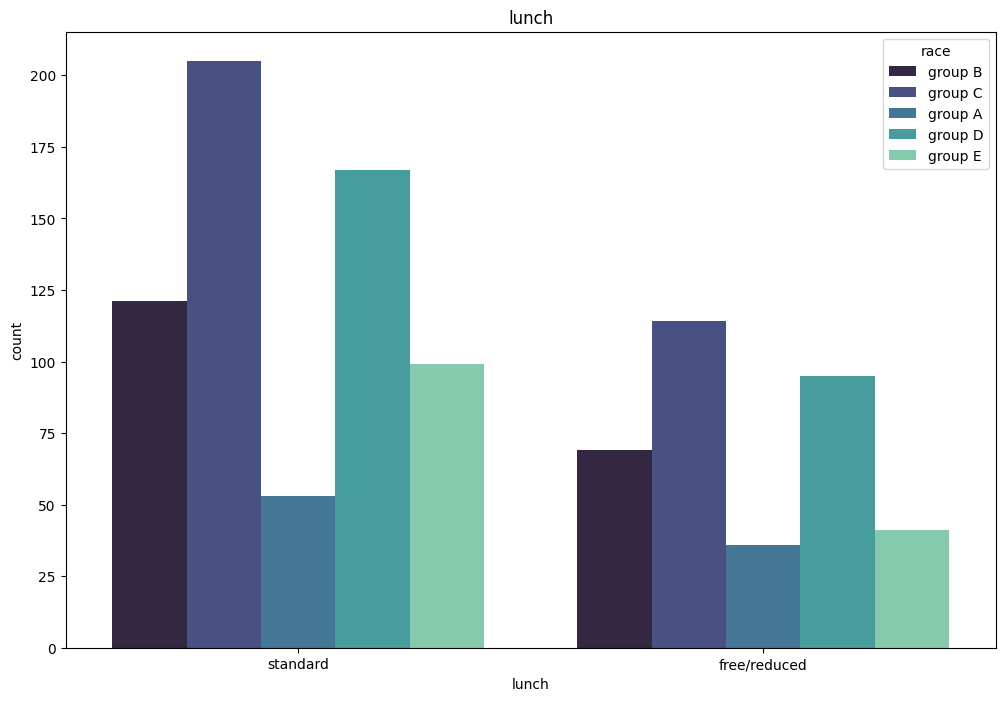

In [31]:
plt.figure(figsize=(12,8));
plt.title('lunch');
sns.countplot(df, x='lunch', hue='race', palette='mako');

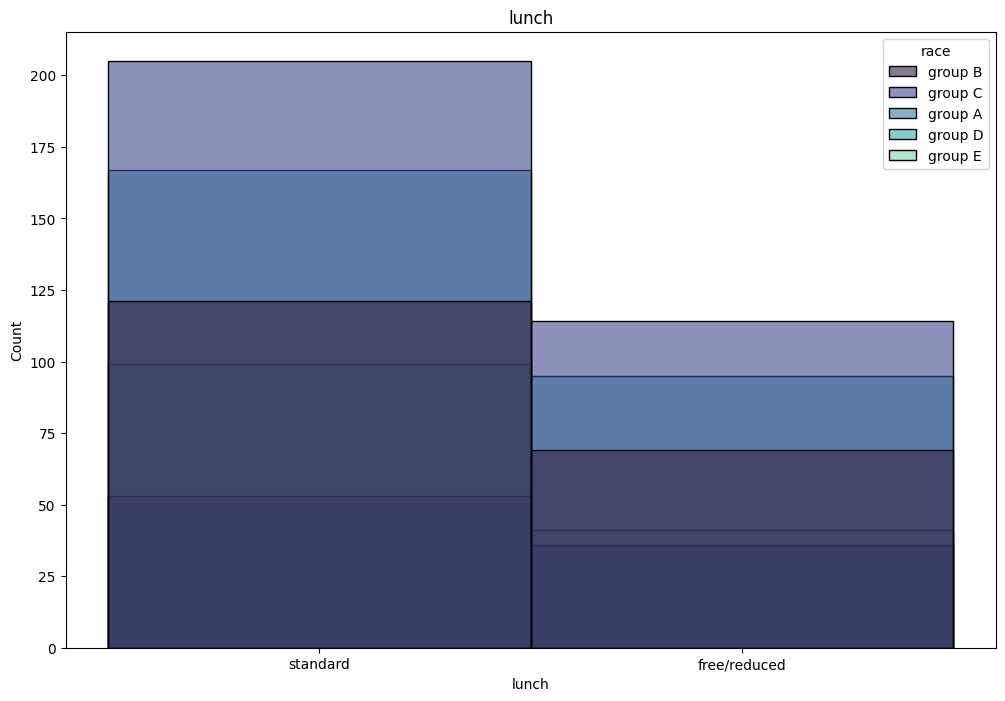

In [32]:
plt.figure(figsize=(12,8));
plt.title('lunch');
sns.histplot(df, x='lunch', hue='race',palette='mako',  alpha=0.6, bins=15 );

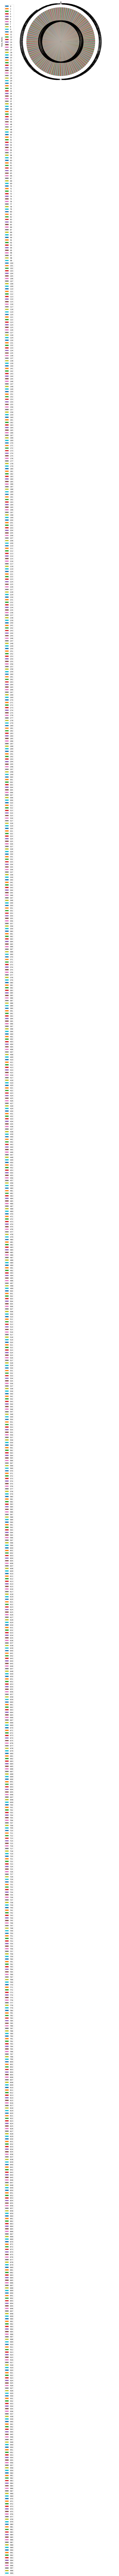

In [33]:

df['Total_Marks'].plot(kind='pie',figsize=(12,8),autopct='%1.1f%%',startangle=90,)
plt.title('jjj')
plt.axis('equal')
plt.legend(labels=df.index,loc='upper left')
plt.show()

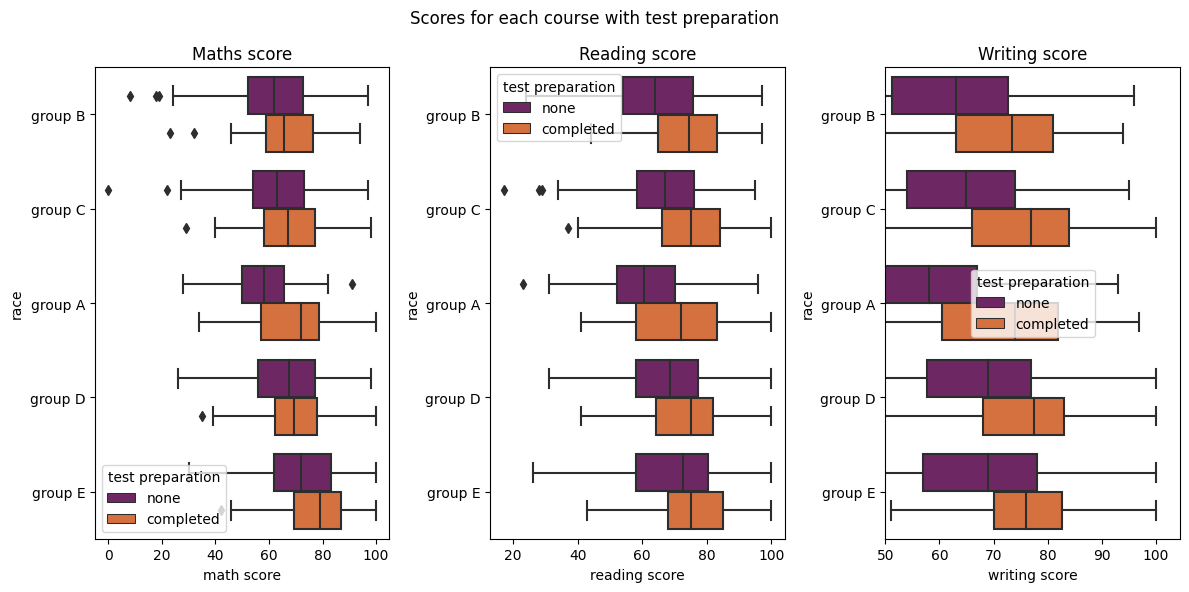

In [34]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.suptitle('Scores for each course with test preparation')

ax[0].set_title('Maths score');
ax[1].set_title('Reading score');
ax[2].set_title('Writing score');

sns.boxplot(ax=ax[0], data=df, x='math score', y='race', palette='inferno', hue='test preparation');
sns.boxplot(ax=ax[1], data=df, x='reading score', y='race', palette='inferno', hue='test preparation');
sns.boxplot(ax=ax[2], data=df, x='writing score', y='race', palette='inferno', hue='test preparation');

plt.xlim(50)
plt.tight_layout();
plt.show();